In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df['age'].describe()

,age
count,100000.000000
mean,41.885856
std,22.516840
min,0.080000
25%,24.000000
50%,43.000000
75%,60.000000
max,80.000000


In [ ]:
numerical_features = df.select_dtypes(include = ["number"]).columns
categorical_features = df.select_dtypes(include = ["object"]).columns
print(len(numerical_features), len(categorical_features))

7 2


In [ ]:
# check if this data is regression or categorization problem
df['diabetes'].unique()

array([0, 1])

In [ ]:
df_sample = df.sample(frac = 0.1, random_state=21)

In [ ]:
df_sample

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
39544,Female,28.0,0,0,current,28.51,5.7,90,0
24258,Male,80.0,0,0,never,25.84,4.8,158,0
23442,Female,28.0,0,0,never,27.32,3.5,126,0
35853,Female,15.0,0,0,never,24.28,6.6,200,0
35928,Male,68.0,0,0,No Info,27.02,6.6,90,0
...,...,...,...,...,...,...,...,...,...
16625,Female,54.0,0,0,current,21.04,4.0,140,0
94849,Female,73.0,0,0,No Info,26.96,6.0,100,0
26417,Male,9.0,0,0,No Info,28.58,4.5,200,0
84629,Female,4.0,0,0,No Info,14.01,5.8,100,0


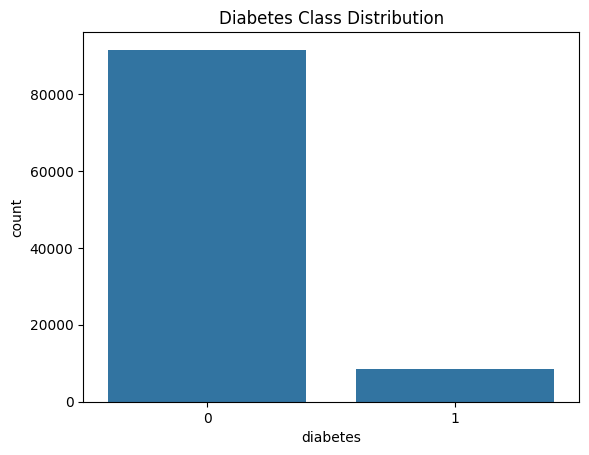

In [ ]:
# check if this data is regression or categorization problem
from matplotlib import pyplot as plt
import seaborn as sns
sns.countplot(x='diabetes', data=df)
plt.title("Diabetes Class Distribution")
plt.show()

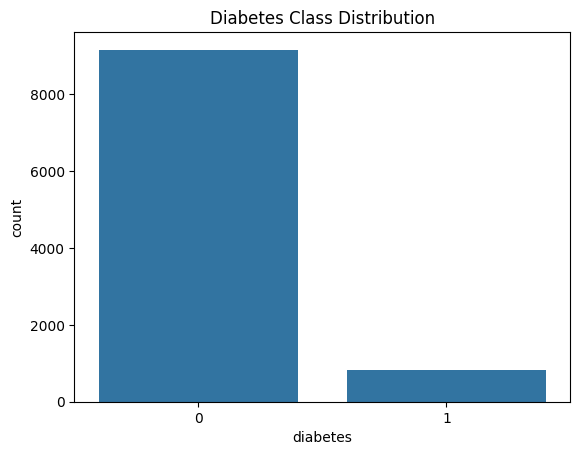

In [ ]:
# check if this data is regression or categorization problem
from matplotlib import pyplot as plt
import seaborn as sns
sns.countplot(x='diabetes', data=df_sample)
plt.title("Diabetes Class Distribution")
plt.show()

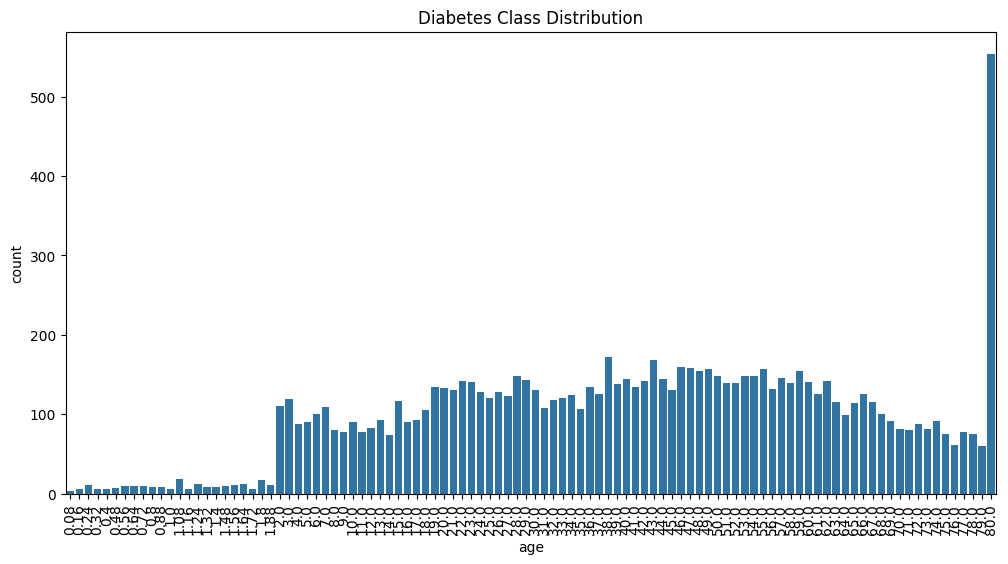

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
# sns.countplot(x='age', data=df_sample)
# plt.title("Diabetes Class Distribution")
# plt.show()
plt.figure(figsize=(12, 6))
sns.countplot(x='age', data=df_sample)
plt.xticks(rotation=90)  # rotate labels
plt.title("Diabetes Class Distribution")
plt.show()

In [ ]:
df['smoking_history'].unique() # Order matters

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
df['gender'].unique() # No matter

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
df_encoded = pd.get_dummies(df, columns=['gender'], drop_first=True, dtype=int)

In [ ]:
df_encoded.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other
0,80.0,0,1,never,25.19,6.6,140,0,0,0
1,54.0,0,0,No Info,27.32,6.6,80,0,0,0
2,28.0,0,0,never,27.32,5.7,158,0,1,0
3,36.0,0,0,current,23.45,5.0,155,0,0,0
4,76.0,1,1,current,20.14,4.8,155,0,1,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# 1) Ensure the column exists and is categorical with your desired order (optional but nice)
order = ['No Info', 'never', 'ever', 'former', 'not current', 'current']
df_encoded['smoking_history'] = pd.Categorical(df_encoded['smoking_history'],
                                               categories=order,
                                               ordered=True)

# 2) Build the encoder with your order
encoder = OrdinalEncoder(categories=[order])

# 3) Fit+transform needs a 2D input -> use double brackets
df_encoded['smoking_history_encoded'] = encoder.fit_transform(
    df_encoded[['smoking_history']]
)

In [ ]:
df_encoded.drop('smoking_history', axis=1, inplace=True)

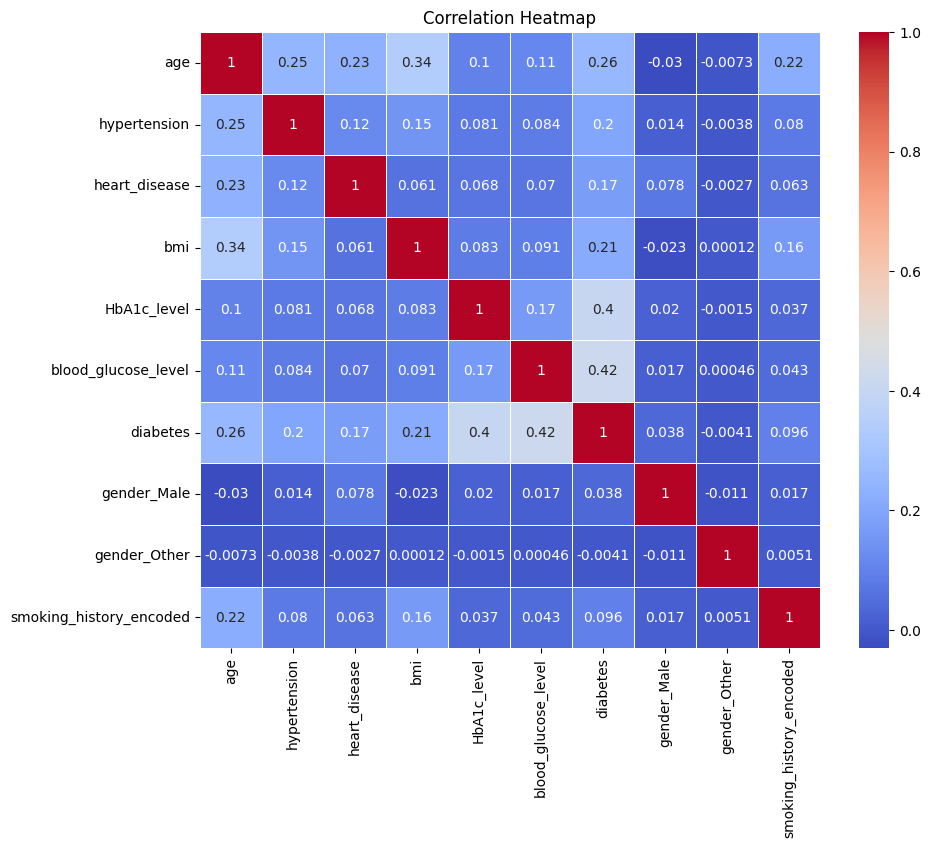

In [ ]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df_encoded.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00
gender_Male,100000.0,0.414300,0.492603,0.00,0.00,0.00,1.00,1.00
gender_Other,100000.0,0.000180,0.013415,0.00,0.00,0.00,0.00,1.00
smoking_history_encoded,100000.0,1.433770,1.627925,0.00,0.00,1.00,3.00,5.00


In [ ]:
numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_history_encoded']

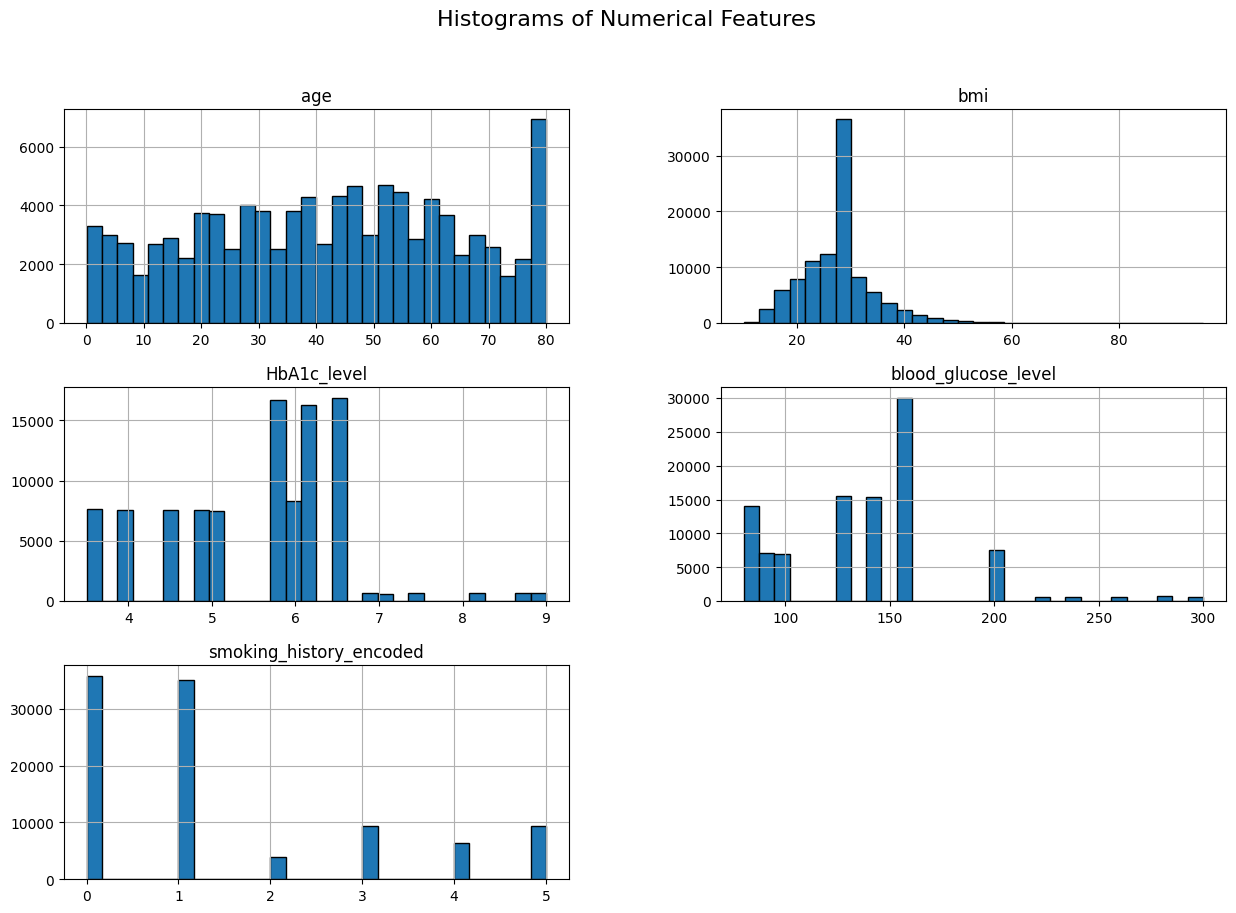

In [ ]:
df_encoded[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

In [4]:
import pandas as pd
import numpy as np
df_encoded = pd.read_csv("data_preprocessed.csv")
df_encoded

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_encoded
0,1.692704,0,1,-0.321056,1.001706,0.047704,0,0,0,-0.266457
1,0.538006,0,0,-0.000116,1.001706,-1.426210,0,0,0,-0.880739
2,-0.616691,0,0,-0.000116,0.161108,0.489878,0,1,0,-0.266457
3,-0.261399,0,0,-0.583232,-0.492690,0.416183,0,0,0,2.190671
4,1.515058,1,1,-1.081970,-0.679490,0.416183,0,1,0,2.190671
...,...,...,...,...,...,...,...,...,...,...
99995,1.692704,0,0,-0.000116,0.628107,-1.180558,0,0,0,-0.880739
99996,-1.771388,0,0,-1.499343,0.908306,-0.934905,0,0,0,-0.880739
99997,1.070944,0,0,0.076729,0.161108,0.416183,0,1,0,0.962107
99998,-0.794336,0,0,1.220361,-1.426688,-0.934905,0,0,0,-0.266457


In [5]:
from sklearn.model_selection import train_test_split
x, y = df_encoded.drop('diabetes', axis=1), df_encoded['diabetes']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=21, stratify = y)
print(f"Train size: {len(x_train)} samples ({len(x_train)/len(x)})")
print(f"Test size: {len(x_test)} samples ({len(x_test)/len(x)})")

Train size: 90000 samples (0.9)
Test size: 10000 samples (0.1)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# 1. Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# 2. Define the hyperparameter distributions for RandomizedSearchCV
param_dist_gb = {
    'n_estimators': [100, 200, 300],       # number of trees
    'learning_rate': [0.01, 0.1, 0.2],     # shrinkage
    'max_depth': [3, 5, 7],               # tree depth
    'subsample': [0.5, 0.8, 1.0],         # fraction of samples per tree
    'min_samples_split': [2, 5, 10]       # min samples to split a node
}

# 3. Set up RandomizedSearchCV
random_search_gb = RandomizedSearchCV(
    gb_model,
    param_distributions=param_dist_gb,
    n_iter=50,               # number of random combinations to try
    cv=3,                    # 3-fold cross-validation on the training set
    scoring='f1_macro',   # use f1 for evaluation (for classification)
    n_jobs=-1,               # parallelize across CPU cores
    random_state=21,         # for reproducibility of random search
    verbose=1                # print progress messages
)

# 4. Run the random search on the training data
random_search_gb.fit(x_train, y_train)

# 5. Examine the best hyperparameters and score from random search
print("Best parameters (RandomizedSearchCV):", random_search_gb.best_params_)
print("Best CV score (RandomizedSearchCV):", random_search_gb.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters (RandomizedSearchCV): {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 3, 'learning_rate': 0.1}
Best CV score (RandomizedSearchCV): 0.8960167271372076


In [ ]:
best_gb_model = random_search_gb.best_estimator_

In [ ]:
import joblib

# Example: saving the best XGBoost model
joblib.dump(best_gb_model, "best_gb_model.pkl")

['best_gb_model.pkl']

In [ ]:
from xgboost import XGBClassifier

# 1. Initialize XGBClassifier (suppress warnings and set a random state for reproducibility)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=21)

# 2. Define hyperparameter distributions for XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'min_child_weight': [1, 5, 10]
}

# 3. Randomized search for XGBoost
random_search_xgb = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=21,
    verbose=1
)
random_search_xgb.fit(x_train, y_train)

print("Best parameters (RandomizedSearchCV, XGB):", random_search_xgb.best_params_)
print("Best CV score (RandomizedSearchCV, XGB):", random_search_xgb.best_score_)


best_xgb_model = random_search_xgb.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:09:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters (RandomizedSearchCV, XGB): {'subsample': 0.5, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
Best CV score (RandomizedSearchCV, XGB): 0.8964931828488202


In [ ]:
import joblib

# Example: saving the best XGBoost model
joblib.dump(best_xgb_model, "best_xgb_model.pkl")

['best_xgb_model.pkl']

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

# 1. Initialize CatBoostClassifier (suppress output with logging_level='Silent')
cat_model = CatBoostClassifier(logging_level='Silent', random_state=21)

# 2. Define hyperparameter distributions for CatBoost
param_dist_cat = {
    'iterations': [100, 200, 300],    # number of trees
    'depth': [4, 6, 8],              # tree depth
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7]      # L2 regularization strength
    # (CatBoost has other parameters like border_count, etc., which can be tuned as well)
}

# 3. Randomized search for CatBoost
random_search_cat = RandomizedSearchCV(
    cat_model,
    param_distributions=param_dist_cat,
    n_iter=50,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
random_search_cat.fit(x_train, y_train)

print("Best parameters (RandomizedSearchCV, CatBoost):", random_search_cat.best_params_)
print("Best CV score (RandomizedSearchCV, CatBoost):", random_search_cat.best_score_)


best_cat_model = random_search_cat.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters (RandomizedSearchCV, CatBoost): {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 100, 'depth': 6}
Best CV score (RandomizedSearchCV, CatBoost): 0.8963325886912642


In [ ]:
import joblib

# Example: saving the best XGBoost model
joblib.dump(best_cat_model, "best_cat_model.pkl")

['best_cat_model.pkl']

In [6]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 17.2 MB/s eta 0:00:00


In [7]:
import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        'min_child_weight': trial.suggest_float("min_child_weight", 1, 10)
    }

    model = XGBClassifier(**params, use_label_encoder=False, eval_metric="logloss")
    score = cross_val_score(model, x_train, y_train, cv=3, scoring="f1_macro").mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2025-08-21 12:41:48,762] A new study created in memory with name: no-name-5edea44a-c80c-4e71-b351-08a555d3f2e3
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:41:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:41:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:41:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-08-21 12:41:52,112] Trial 0 finished with value: 0.8968649819506626 and parameters: {'n_estimators': 55, 'max_depth': 4, 'learning_rate': 0.22138992237813238, 'subsample': 0.5709963499498482, 'colsample_

Best parameters: {'n_estimators': 83, 'max_depth': 4, 'learning_rate': 0.21654742665997237, 'subsample': 0.7640182057693413, 'colsample_bytree': 0.5454689526582732, 'min_child_weight': 4.840874245857551}
Best accuracy: 0.8974051382741797


In [8]:
# ---- Imports ----
import joblib
import numpy as np

from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix
)

# Optional: pretty-print confusion matrix
def print_confusion(cm, labels=None):
    print("Confusion Matrix:")
    if labels is not None:
        header = "          " + "  ".join([f"{l:>8}" for l in labels])
        print(header)
        for i, row in enumerate(cm):
            label = f"{labels[i]:>8}" if labels is not None else f"{i:>8}"
            print(label, "  " + "  ".join([f"{n:>8}" for n in row]))
    else:
        print(cm)

In [9]:
# ---- Unified evaluation function ----
def evaluate_on_test(model, x_test, y_test, label_names=None, average='binary'):
    """
    model: fitted sklearn/xgboost/catboost model with .predict()
    average: 'binary' or 'macro'/'weighted' (use 'macro' or 'weighted' for multiclass)
    """
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average=average, zero_division=0
    )
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}\n")

    print_confusion(cm, labels=label_names)

    # Detailed per-class breakdown (especially useful for multiclass)
    print("\nClassification report:")
    print(classification_report(y_test, y_pred, target_names=label_names, zero_division=0))

In [16]:
import json

# Example: save best params from GridSearchCV
best_params = study.best_params

# Save to JSON
with open("xgb_best_params.json", "w") as f:
    json.dump(best_params, f)

# Load later
with open("xgb_best_params.json", "r") as f:
    loaded_params = json.load(f)

# Recreate a model with the same parameters
xgb_model_recreated = XGBClassifier(**loaded_params, use_label_encoder=False, eval_metric='logloss')
xgb_model_recreated.fit(x_train, y_train)  # retrain if needed

# Example: saving the best XGBoost model
joblib.dump(xgb_model_recreated, "xgb_model_recreated.pkl")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:48:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['xgb_model_recreated.pkl']

In [17]:
model = joblib.load("xgb_model_recreated.pkl")  # <-- change path to your saved file
# Set averaging mode: 'binary' for binary tasks, 'weighted' or 'macro' for multiclass
evaluate_on_test(model, x_test, y_test, label_names=None, average='binary')

Accuracy:  0.9694
Precision: 0.9642
Recall:    0.6647
F1-score:  0.7869

Confusion Matrix:
[[9129   21]
 [ 285  565]]

Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      9150
           1       0.96      0.66      0.79       850

    accuracy                           0.97     10000
   macro avg       0.97      0.83      0.89     10000
weighted avg       0.97      0.97      0.97     10000

